# Train_data_preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("train.csv", encoding='latin-1')

In [4]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [6]:
train_df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [7]:
train_df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [8]:
# prompt: remove null rows

train_df = train_df.dropna()


In [9]:
train_df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [10]:
# Import necessary libraries for preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary

    text = text.lower()  # Lowercase the text
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize the text
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stop words
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return " ".join(words)

# Apply preprocessing to the text column
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

# Display the first few rows of the cleaned dataset
print(train_df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balim\AppData\Roaming\nltk_data...


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  \
0  Afghanistan          38928346         652860.0   

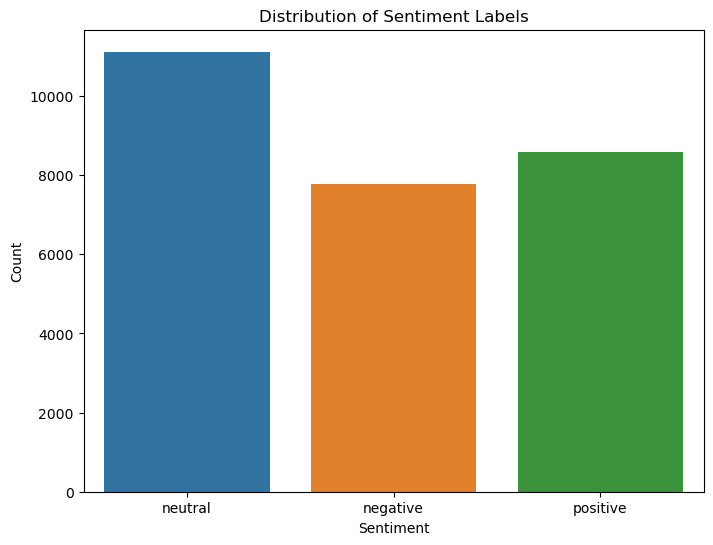

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X_train = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])

# Convert the sentiment labels to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['sentiment'])


# Test_data_preprocessing

In [15]:
test_df = pd.read_csv("test.csv", encoding='latin-1')

In [16]:
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [18]:
# Apply preprocessing to the text column
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Display the first few rows of the cleaned dataset
print(test_df.head())

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)                                      

In [19]:
# Fit and transform the cleaned text data
X_test = tfidf_vectorizer.fit_transform(test_df['cleaned_text'])

# Convert the sentiment labels to numerical values
y_test = label_encoder.fit_transform(test_df['sentiment'])

# Model_Implimantation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions and evaluate the Naive Bayes model
nb_predictions = nb_model.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_predictions))
print('Naive Bayes Precision:', precision_score(y_test, nb_predictions, average='weighted'))
print('Naive Bayes Recall:', recall_score(y_test, nb_predictions, average='weighted'))
print('Naive Bayes F1 Score:', f1_score(y_test, nb_predictions, average='weighted'))

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions and evaluate the SVM model
svm_predictions = svm_model.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, svm_predictions))
print('SVM Precision:', precision_score(y_test, svm_predictions, average='weighted'))
print('SVM Recall:', recall_score(y_test, svm_predictions, average='weighted'))
print('SVM F1 Score:', f1_score(y_test, svm_predictions, average='weighted'))


Naive Bayes Accuracy: 0.2652128764278297
Naive Bayes Precision: 0.20898504953944558
Naive Bayes Recall: 0.2652128764278297
Naive Bayes F1 Score: 0.22362135920053114


C:\Users\balim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.2851505711318795
SVM Precision: 0.20576805507351056
SVM Recall: 0.2851505711318795
SVM F1 Score: 0.178034176539932


C:\Users\balim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['rbf']
}

# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the tuned model
print('Best Parameters:', grid_search.best_params_)
svm_best_model = grid_search.best_estimator_
svm_best_predictions = svm_best_model.predict(X_test)
print('Tuned SVM Accuracy:', accuracy_score(y_test, svm_best_predictions))
print('Tuned SVM Precision:', precision_score(y_test, svm_best_predictions, average='weighted'))
print('Tuned SVM Recall:', recall_score(y_test, svm_best_predictions, average='weighted'))
print('Tuned SVM F1 Score:', f1_score(y_test, svm_best_predictions, average='weighted'))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  56.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  57.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  55.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  58.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.5min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 4.6min
[CV] END ...........................C=1, gamma=1,

C:\Users\balim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.model_selection import cross_val_score

# Assuming 'X' should be the combined training and test data
X = tfidf_vectorizer.fit_transform(pd.concat([train_df['cleaned_text'], test_df['cleaned_text']]))
# Assuming 'y' should be the combined training and test labels
y = label_encoder.fit_transform(pd.concat([train_df['sentiment'], test_df['sentiment']]))

# Perform 5-fold cross-validation for the SVM model
cv_scores = cross_val_score(svm_best_model, X, y, cv=5)

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.70274036 0.70459824 0.71156526 0.71295866 0.71063632]
Mean CV Score: 0.7084997677659081


In [24]:
pip install lime



     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 186.2 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/275.7 kB 186.2 kB/s eta 0:00:02
     ------------ ------------------------ 92.2/275.7 kB 403.5 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/275.7 kB 403.5 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/275.7 kB 425.3 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/275.7 kB 425.3 kB/s eta 0:00:01
     ------------------------- ---------- 194.6/275.7 kB 452.9 kB/s eta 0:00:01
     ------------------------- ---------- 194.6/275.7 kB 452.9 kB/s eta 0:00:01
     ------------------------------ ----- 235.5/275.7 kB 436.6 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 4

In [35]:
import lime
import lime.lime_text

grid_search = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2)
svm_best_model = grid_search.best_estimator_
# Initialize LIME explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=label_encoder.classes_)

# Explain a prediction
idx = 0  # Index of the sample to explain
# Assuming 'svm_best_model' is a pipeline with a predict_proba method
exp = explainer.explain_instance(train_df['cleaned_text'][idx], svm_best_model.predict_proba, num_features=10, labels=[0,1]) 
exp.show_in_notebook(text=True)


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
<!-- #Confusion matrix -->
conf_matrix = confusion_matrix(y_test, svm_best_predictions)
print('Confusion Matrix:\n', conf_matrix)

<!-- # Precision-Recall curve -->
precision, recall, _ = precision_recall_curve(y_test, svm_best_predictions)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

<!-- # ROC-AUC score -->
roc_auc = roc_auc_score(y_test, svm_best_model.decision_function(X_test))
print('ROC-AUC Score:', roc_auc)


In [ ]:
# Deployment can be done using frameworks like Flask or FastAPI
# Here is a simple example using Flask

from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    text = request.json['text']
    cleaned_text = preprocess_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = svm_best_model.predict(vectorized_text)
    sentiment = label_encoder.inverse_transform(prediction)
    return jsonify({'sentiment': sentiment[0]})

if __name__ == '__main__':
    app.run(debug=True)
